# Epileptic seizure detection from EEG signals using Deep Learning
  
  

In [1]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation
import pandas as pd

import matplotlib.pyplot as plt

Using TensorFlow backend.


# Data Preprocessing

In [2]:
df=pd.read_csv('C:/Users/HP/Desktop/Project/Project Phase II/data.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
X=df.values

In [4]:
X=X[:,1:-1]


In [5]:
from sklearn.model_selection import train_test_split


y=np.array(df['y'])
Y=np_utils.to_categorical(y)
Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [6]:
print(X.shape,y.shape)

(11500, 178) (11500,)


# Intuition of the Epileptical Signal In the Dataset 

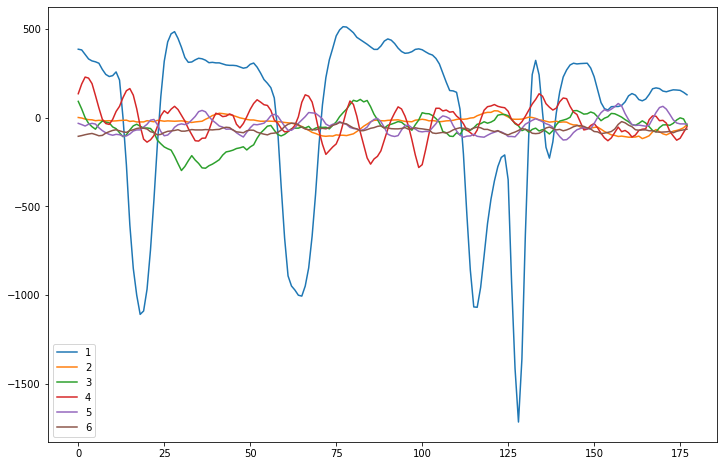

In [7]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.plot(X[3,:],label='6')
plt.legend()
plt.show()

# Creating Artifitial Neural Net Model For the Classification 

In [8]:
model=Sequential()


model.add(Dense(256,input_shape=(45,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               11776     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_______

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
model.fit(((X_train[:,::4]-X_train.mean())/X_train.std()),Y_train[:,1:],10,100,verbose=2,validation_data=((X_test[:,::4]-X_test.mean())/X_test.std(),Y_test[:,1:]))


Train on 9200 samples, validate on 2300 samples
Epoch 1/100
 - 7s - loss: 0.3592 - acc: 0.8402 - val_loss: 0.2994 - val_acc: 0.8617
Epoch 2/100
 - 4s - loss: 0.2695 - acc: 0.8681 - val_loss: 0.2727 - val_acc: 0.8695
Epoch 3/100
 - 5s - loss: 0.2425 - acc: 0.8790 - val_loss: 0.2558 - val_acc: 0.8731
Epoch 4/100
 - 5s - loss: 0.2286 - acc: 0.8819 - val_loss: 0.2572 - val_acc: 0.8712
Epoch 5/100
 - 5s - loss: 0.2145 - acc: 0.8889 - val_loss: 0.2487 - val_acc: 0.8745
Epoch 6/100
 - 5s - loss: 0.2031 - acc: 0.8954 - val_loss: 0.2484 - val_acc: 0.8762
Epoch 7/100
 - 6s - loss: 0.1977 - acc: 0.8996 - val_loss: 0.2628 - val_acc: 0.8779
Epoch 8/100
 - 5s - loss: 0.1799 - acc: 0.9101 - val_loss: 0.2495 - val_acc: 0.8794
Epoch 9/100
 - 6s - loss: 0.1697 - acc: 0.9135 - val_loss: 0.2563 - val_acc: 0.8780
Epoch 10/100
 - 5s - loss: 0.1651 - acc: 0.9187 - val_loss: 0.2817 - val_acc: 0.8740
Epoch 11/100
 - 5s - loss: 0.1609 - acc: 0.9244 - val_loss: 0.3067 - val_acc: 0.8715
Epoch 12/100
 - 6s - loss

Epoch 95/100
 - 5s - loss: 0.0104 - acc: 0.9973 - val_loss: 0.7326 - val_acc: 0.8877
Epoch 96/100
 - 4s - loss: 0.0179 - acc: 0.9950 - val_loss: 0.5141 - val_acc: 0.8856
Epoch 97/100
 - 4s - loss: 0.0194 - acc: 0.9946 - val_loss: 0.7019 - val_acc: 0.8895
Epoch 98/100
 - 5s - loss: 0.0158 - acc: 0.9955 - val_loss: 0.7788 - val_acc: 0.8895
Epoch 99/100
 - 5s - loss: 0.0185 - acc: 0.9948 - val_loss: 0.6711 - val_acc: 0.8890
Epoch 100/100
 - 6s - loss: 0.0140 - acc: 0.9959 - val_loss: 0.5916 - val_acc: 0.8869


# Accuracy on Validation Set

In [11]:
ypred=model.predict((X_test[:,::4]-X_test.mean())/X_test.std())
ypred.shape

(2300, 5)

In [12]:
yp=np.zeros((Y_test.shape[0]))
yo=np.ones((Y_test.shape[0]))

In [13]:
for i in range(Y_test.shape[0]):
    yp[i]=np.argmax(ypred[i])+1
    yo[i]=np.argmax(Y_test[i])

In [14]:
yp.shape

(2300,)

In [15]:
yo.shape

(2300,)

In [16]:
np.unique(yo)

array([1., 2., 3., 4., 5.])

In [17]:
np.unique(Y_test)

array([0., 1.], dtype=float32)

In [18]:
np.unique(yp)

array([1., 2., 3., 4., 5.])

In [19]:
yo.shape

(2300,)

In [20]:
#conversion of classes
for i in range(Y_test.shape[0]):
    if yo[i]!=1:
        yo[i]=0
    if yp[i]!=1:
        yp[i]=0

In [21]:
np.unique(yo)

array([0., 1.])

In [22]:
np.unique(yp)

array([0., 1.])

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(yo,yp)

0.9739130434782609

In [26]:
import smtplib 
from email.mime.multipart import MIMEMultipart 
from email.mime.text import MIMEText 
from email.mime.base import MIMEBase 
from email import encoders 
def mails(msgg):
    msgg=str(msgg)

    fromaddr = "sur5gk@gmail.com"
    toaddr = "@gmail.com"

    # instance of MIMEMultipart
    msg = MIMEMultipart() 
    
    # storing the senders email address
    msg['From'] = fromaddr 

    # storing the receivers email address
    msg['To'] = toaddr 

    # storing the subject 
    msg['Subject'] = "Project"

    # string to store the body of the mail 
    body = msgg

    # attach the body with the msg instance
    msg.attach(MIMEText(body, 'plain')) 

    # open the file to be sent
    filename = "001.png"
    attachment = open("001.png", "rb") 

     
    # instance of MIMEBase and named as p
    p = MIMEBase('application', 'octet-stream') 

    # To change the payload into encoded form
    p.set_payload((attachment).read()) 

    # encode into base64
    encoders.encode_base64(p) 

    p.add_header('Content-Disposition', "attachment; filename= %s" % filename) 

    # attach the instance 'p' to instance 'msg' 
    msg.attach(p) 

    # creates SMTP session 
    s = smtplib.SMTP('smtp.gmail.com', 587) 

    # start TLS for security 
    s.starttls() 

    # Authentication 
    s.login(fromaddr, "uqvc lmpk mqio prbm") 

    # Converts the Multipart msg into a string 
    text = msg.as_string() 

    # sending the mail 
    s.sendmail(fromaddr, toaddr, text) 

    # terminating the session 
    s.quit() 
    

In [94]:
#print(model.predict((X_test[:,::4]-X_test.mean())/X_test.std()))
pred=int(yo[1])
print(pred)
if(pred==1):
    print('Alert')
    mails('Positive result')
else:
    print('Normal')

0
Normal
